This lab content is borrowed from
<a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkCV0101ENCoursera25797139-2022-01-01" target="_blank">
IBM Skills Network
</a>


<h1>Intensity Transformations</h1>


In this lab, we will apply Intensity Transformations, making objects easier to see by improving image contrast and brightness. In the last portion of the lab, you will use thresholding to segment objects from images.


Download the images for the lab. Below lines get the images into memory, but they are not assigned to variables yet. Later we will assign them by using imread functions.


In [21]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/goldhill.bmp -O goldhill.bmp
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/cameraman.jpeg -O cameraman.jpeg
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/mammogram.png -O mammogram.png

'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.


We will be using these imported functions in the lab


In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\Nurcan\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\Nurcan\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\Users\Nurcan\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "c:\Users\Nurcan\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "c:\Users\Nurcan\anaconda3\lib\site

AttributeError: _ARRAY_API not found

ImportError: numpy.core.multiarray failed to import

## What is an Intensity Transformation?


It's helpful to think of an image as a function $f(x,y)$ instead of an array at this point, where `x` is the row index and `y` is the column index. You can apply a transformation $T$ to the image and get a new image:
$$
g(x,y)=T(f(x,y))
$$

An Intensity Transformation depends on only one single point $(x,y)$. For example, you can apply a linear transform $g(x,y) = 2f(x,y) + 1$; this will multiply each image pixel by two and add one.

As the intensity transformation only depends on one value; as a result, it is sometimes referred to as point processing or gray-level mapping. The variable $r$ is the input intensity, $s$ is the output intensity:

$$
s=T(r)
$$


## Image Negatives


Consider an image with $L$ intensity values ranging from $[0,L-1]$.  We can reverse the intensity levels by applying the following:
$$
g(x,y)=L-1-f(x,y)
$$

Using the intensity transformation function notation
$$
s = L - 1 - r
$$

This is called the image negative. For $L= 256$ the formulas simplifys to:
$$
g(x,y)=255-f(x,y) \qquad \mbox{and} \qquad s=255-r
$$


Reversing image intensity has many applications, including making it simpler to analyze medical images. Consider the mammogram with micro-calcifications on the upper quadrant:


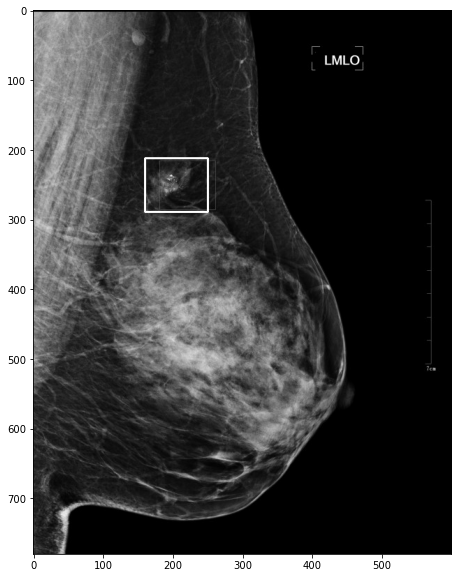

In [29]:
image = cv2.imread("mammogram.png", cv2.IMREAD_GRAYSCALE)
cv2.rectangle(image, pt1=(160, 212), pt2=(250, 289), color = (255), thickness=2)

plt.figure(figsize = (10,10))
plt.imshow(image, cmap="gray")
plt.show()

We can apply the intensity transformation:


In [42]:
img_neg = -1 * image + 255

We see the micro-calcifications in the image negatives is easier it is to analyze:


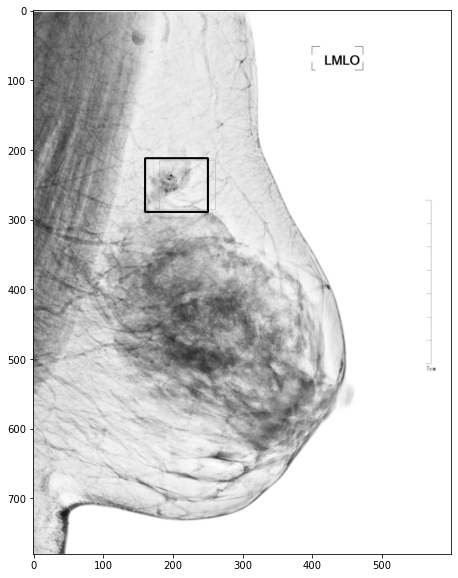

In [44]:
plt.figure(figsize=(10,10))
plt.imshow(img_neg, cmap = "gray")
plt.show()

## Thresholding and Simple Segmentation


Thresholding is used in image segmentation, which means extracting objects from an image. Image segmentation is used in many applications including extracting text, medical imaging, and industrial imaging.
Thresholding an image uses a threshold. If a particular pixel is greater than the threshold, it will be set to a predefined value (usually 1.0 or 255). Other pixels will be set to another value (usually 0). We can write a Python function that will perform thresholding and output a new image given some input grayscale image:


In [83]:
def thresholding(input_img, threshold, max_value=255, min_value=0):
    N,M=input_img.shape
    image_out=np.zeros((N,M),dtype=np.uint8)

    for i  in range(N):
        for j in range(M):
            if input_img[i,j]> threshold:
                image_out[i,j]=max_value
            else:
                image_out[i,j]=min_value

    return image_out

Consider the cameraman image:


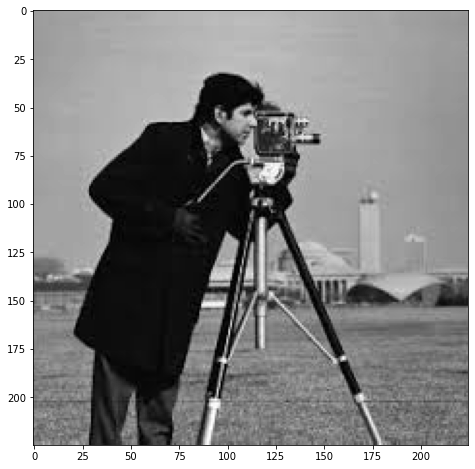

In [84]:
image = cv2.imread("cameraman.jpeg", cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(8, 8))
plt.imshow(image, cmap="gray")
plt.show()

The cameraman himself corresponds to the darker pixels, therefore we can set the threshold in such a way as to segment the cameraman. In this case, it looks like less than 90, let’s give it a try:


In [85]:
threshold = 87
max_value = 255
min_value = 0
new_image = thresholding(image, threshold=threshold, max_value=max_value, min_value=min_value)

First, lets define a helper function to plot two images side-by-side:


In [87]:
def plot_image(image_1, image_2, title_1="Original", title_2="New Image"):
    plt.figure(figsize=(10,10))
    plt.subplot(1, 2, 1)
    plt.imshow(image_1,cmap="gray")
    plt.title(title_1)
    plt.subplot(1, 2, 2)
    plt.imshow(image_2,cmap="gray")
    plt.title(title_2)
    plt.show()

We see the pixels corresponding to the cameraman are now zero and the rest are set to 255:


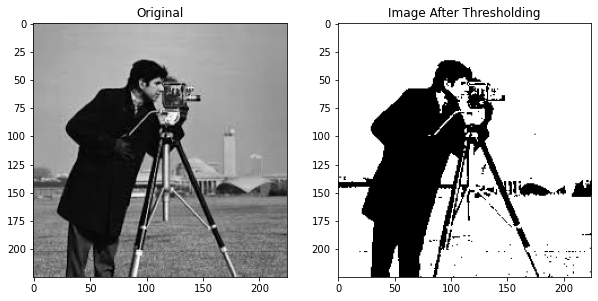

In [88]:
plot_image(image, new_image, "Original", "Image After Thresholding")

The function <code>cv.threshold</code> in openCV does thresholding with the following parameters:


<code>cv.threshold(grayscale image, threshold value, maximum value to use, thresholding type)</code>


The  parameter <code>thresholding type</code> is the type of thresholding we would like to perform. For example, we have basic thresholding: <code>cv2.THRESH_BINARY</code> this is the type we implemented in the function <code>thresholding</code>.


We can apply thresholding to the image as follows:


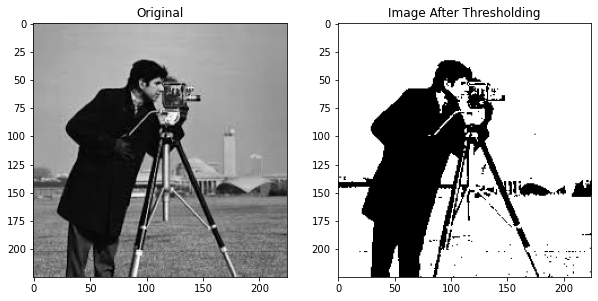

87.0


In [65]:
ret, new_image = cv2.threshold(image,threshold,max_value,cv2.THRESH_BINARY)
plot_image(image,new_image,"Original","Image After Thresholding")
print(ret)

<code>ret</code> is the threshold value (which we sent in as a parameter) and <code>new_image</code> is the image after thresholding has been applied. There are different threshold types, for example, cv2.THRESH_TRUNC will not change the values if the pixels are less than the threshold value:


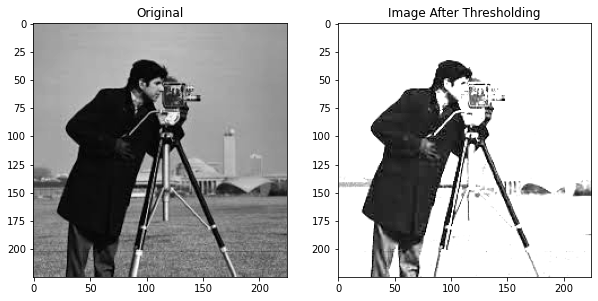

86.0


In [67]:
ret, new_image = cv2.threshold(image,86,255,cv2.THRESH_TRUNC)
plot_image(image,new_image,"Original","Image After Thresholding")
print(ret)

We see that the darker elements have not changed and the lighter values are set to 255.


## Homework #1 - Due Date: 21 Oct, 23:59##

1. Upload a personal image in a hosting place that can be accessed using an URL. Alternatively, you can pick an image from an URL already available (but not the ones used in the lecture). Please select an image with some brightness problems, either too dark or too bright. Because you will try to fix that problem.
2. Display the image making sure that the image has the color channels in the right order.
3. Convert your image into grayscale (you can use any library for this).
4. Implement power law transformation ($s = c$ $r^{\gamma}$) to fix the brightness. You can use $c=1$. Do not forget to normalize your input intensities into [0,1] range. Do not use a built-in function from any library. If your image suffers from low intensities (too dark), $\gamma$ values smaller than 1 should help. If your image suffers from high intensities (too bright), $\gamma$ values greater than 1 should help. Explicitly write which $\gamma$ value you chose.
5. Plot two images (before and after power law transformation) side by side.